### Importing Dependencies

In [1]:
import pandas as pd        # Pandas to work with dataframes
import yfinance as yf	   # Taking Stock data from Yahoo finance
from src.utils import *    # Using our utility function

In [2]:
df = pd.read_csv('datas/Log_returns_data.csv',parse_dates=["date"], index_col="date")
df.head()

,ABB.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASHOKLEY.NS,ASIANPAINT.NS,ASTRAL.NS,AUROPHARMA.NS,AXISBANK.NS,...,TVSMOTOR.NS,ULTRACEMCO.NS,UNIONBANK.NS,UNOMINDA.NS,UPL.NS,VEDL.NS,VOLTAS.NS,WIPRO.NS,YESBANK.NS,ZYDUSLIFE.NS
date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,-0.007338,0.004292,-0.024505,-0.020141,-0.030578,0.013397,0.002417,-0.002834,-0.016435,0.001159,...,-0.009062,-0.005809,-0.007886,-0.041391,0.004794,-0.012802,0.008099,-0.030075,-0.019186,0.000643
2008-01-04,0.006279,-0.003030,-0.028180,-0.011445,-0.001138,0.026268,0.001623,-0.049686,-0.008695,0.018224,...,-0.006323,-0.009876,0.007450,-0.055044,0.018820,-0.002485,0.002947,0.000906,-0.002496,-0.006289
2008-01-07,-0.006412,-0.013050,-0.010618,-0.005596,-0.020346,0.043485,0.060784,0.011861,-0.004235,0.032869,...,0.087657,0.011344,-0.013848,-0.027792,0.007404,-0.013227,-0.023820,-0.029008,0.012800,-0.003240
2008-01-08,-0.000967,-0.025720,-0.018462,-0.003866,-0.021498,-0.042560,0.029101,-0.059322,-0.019810,-0.022637,...,-0.069500,-0.017297,-0.005994,-0.036806,-0.024764,-0.008011,-0.032047,0.014303,-0.012223,-0.029145


Let's see how our network looks for this entire timeline 

### 1. Constructing PMFG at different timelines

In [3]:
from src.plotting import network_plot
from src.metrics import compute_network_metrics
from src.metrics import MST_metrics

In [4]:
G = make_PMFG_Network(df)
mean_returns,risk = compute_node_statistics(df)
network_plot(G, mean_returns,risk, '2008-2022')  # To see the interactive plot

![PMFG Network – 2015](figures/pmfg_2008_2022.png)


For a normal year like 2015, our network looks like this with the given features

In [5]:
df_2015 = df.loc['2015-01-01':'2016-01-01']
G_2015 = make_PMFG_Network(df_2015)

compute_network_metrics(G_2015,print_imp_nodes=True)

Important Nodes 

The Central Nodes are :  [('ICICIBANK.NS', 0.38403), ('HDFCBANK.NS', 0.2767), ('AXISBANK.NS', 0.20221), ('LT.NS', 0.18436), ('YESBANK.NS', 0.17061)]
The Peripheral Nodes are :  [('ABB.NS', 0.0), ('APOLLOHOSP.NS', 0.0), ('ASTRAL.NS', 0.0), ('BHEL.NS', 0.0), ('BLUESTARCO.NS', 0.0)]



,max_degree,avg_clustering,degree_entropy,average_distance,efficiency,modularity
0,33,0.753145,2.911251,3.277089,0.358688,0.635692


![PMFG Network – 2015](figures/pmfg_2015.png)

In [6]:
mean_returns,risk = compute_node_statistics(df_2015)
network_plot(G_2015, mean_returns,risk ,'2008',show=False)

Lets see how our network looks during the 2008 and 2020 crash 

In [7]:
df_2008 = df.loc['2008-01-01':'2008-01-01']
G_2008 = make_PMFG_Network(df_2008)

compute_network_metrics(G_2008,print_imp_nodes=True)

Important Nodes 

The Central Nodes are :  [('ABB.NS', 0.48099), ('ADANIENT.NS', 0.48099), ('ADANIPORTS.NS', 5e-05), ('AMBUJACEM.NS', 5e-05), ('APOLLOHOSP.NS', 5e-05)]
The Peripheral Nodes are :  [('YESBANK.NS', 0.0), ('ZYDUSLIFE.NS', 0.0), ('ADANIPORTS.NS', 5e-05), ('AMBUJACEM.NS', 5e-05), ('APOLLOHOSP.NS', 5e-05)]



,max_degree,avg_clustering,degree_entropy,average_distance,efficiency,modularity
0,122,0.823024,0.239398,1.951619,0.52419,NaN


![PMFG Network – 2015](figures/pmfg_2008.png)

In [8]:

mean_returns,risk = compute_node_statistics(df_2008)
network_plot(G_2008, mean_returns,risk ,'2008',show=False)

In [9]:
df_2020 = df.loc['2020-02-01':'2020-04-30']

G_2020 = make_PMFG_Network(df_2020)

compute_network_metrics(G_2020,print_imp_nodes=True)

Important Nodes 

The Central Nodes are :  [('ICICIBANK.NS', 0.34776), ('HINDALCO.NS', 0.33267), ('ULTRACEMCO.NS', 0.26377), ('VEDL.NS', 0.17717), ('JSWSTEEL.NS', 0.15491)]
The Peripheral Nodes are :  [('ABB.NS', 0.0), ('ASHOKLEY.NS', 0.0), ('AUROPHARMA.NS', 0.0), ('BEL.NS', 0.0), ('BLUESTARCO.NS', 0.0)]



,max_degree,avg_clustering,degree_entropy,average_distance,efficiency,modularity
0,30,0.741064,2.980236,3.464348,0.344789,0.675416


In [10]:
mean_returns,risk = compute_node_statistics(df_2020)
network_plot(G_2020, mean_returns,risk ,'2020')

![PMFG Network – 2015](figures/pmfg_2020.png)

In [11]:
%%time

G = make_PMFG_Network(df)
df_metrics = compute_network_metrics(G)

CPU times: total: 21.8 s
Wall time: 23.3 s


We could see that it takes a long to create a PMFG network, Because we want to make network featues and do not care alot about plotting, we could work with a MST network which is less complicated to create and still keeps the relevant information

### 2. Network Feature Engineering

In [12]:
from src.plotting import plot_confusion_matrix
from src.metrics import classification_metrics

In [13]:
WINDOW = 60                       # The rolling window we use to make a network at t
STEP = 1
TRADING_DAYS_IN_A_YEAR = 252

In [18]:
dfs = []

df_post_2010 = df.loc["2010-01-01":]  # 2008 to 2009 market behavoir is too broken to construct a MST network

for t in range(WINDOW, len(df_post_2010), STEP):

	df_window = df_post_2010.iloc[t-WINDOW:t]

	mst = make_MST_Network(df_window)
	row = MST_metrics(mst)

	row['date'] = df_post_2010.index[t]

	dfs.append(row)

df_mst_rolling = pd.DataFrame(dfs)

df_mst_rolling["date"] = pd.to_datetime(df_mst_rolling["date"])
df_mst_rolling.set_index("date", inplace=True)

df_mst_rolling.head()


{'avg_distance': 7.5719045715047315, 'diameter': 18, 'efficiency': 0.17487422451289542, 'max_degree': 9, 'degree_entropy': np.float64(1.9430874837032106), 'max_betweenness': 0.6593957458338979, 'avg_betweenness': np.float64(0.05431326092152671), 'date': Timestamp('2010-04-01 00:00:00')}
{'avg_distance': 7.086498733839798, 'diameter': 17, 'efficiency': 0.18356180962785146, 'max_degree': 10, 'degree_entropy': np.float64(1.9540112675573305), 'max_betweenness': 0.6611570247933884, 'avg_betweenness': np.float64(0.05030164242842808), 'date': Timestamp('2010-04-05 00:00:00')}
{'avg_distance': 7.961348793815807, 'diameter': 19, 'efficiency': 0.17029716290157093, 'max_degree': 9, 'degree_entropy': np.float64(1.9443174222832147), 'max_betweenness': 0.6241701666440862, 'avg_betweenness': np.float64(0.05753180821335379), 'date': Timestamp('2010-04-06 00:00:00')}
{'avg_distance': 8.186592029854724, 'diameter': 19, 'efficiency': 0.1683368252109897, 'max_degree': 9, 'degree_entropy': np.float64(1.951

,avg_distance,diameter,efficiency,max_degree,degree_entropy,max_betweenness,avg_betweenness
date,,,,,,,
2010-04-01,7.571905,18,0.174874,9,1.943087,0.659396,0.054313
2010-04-05,7.086499,17,0.183562,10,1.954011,0.661157,0.050302
2010-04-06,7.961349,19,0.170297,9,1.944317,0.624170,0.057532
2010-04-07,8.186592,19,0.168337,9,1.951335,0.677009,0.059393
2010-04-08,7.522058,17,0.175416,9,1.906877,0.708576,0.053901


Here we are downloading the NIFTY 50 index data to obtain a baseline for the market

In [19]:
from src.data_extraction import stock_info

# Download NIFTY 50 data
stock = '^NSEI'
start_date = "2009-12-31"
end_date = "2023-01-01"

# API call using yfinance
stock_df = yf.download(stock, start=start_date, end=end_date, progress=False) 

# Obtaining stock datframe with rolling returns and volitality 
nifty_df = stock_info(stock_df ,WINDOW, TRADING_DAYS_IN_A_YEAR)
nifty_df.head()

Price,Close,returns,volatility
Date,,,
2010-04-01,5290.500000,0.007856,0.160007
2010-04-05,5368.399902,0.014617,0.162284
2010-04-06,5366.000000,-0.000447,0.161374
2010-04-07,5374.649902,0.001611,0.161394
2010-04-08,5304.450195,-0.013147,0.163554


Joining the metric dataframe with the baseline features to have the complete dataset we will work with

In [20]:
df_merged = df_mst_rolling.join( nifty_df[["Close", "returns", "volatility"]],how="inner")

df_merged.head()

,avg_distance,diameter,efficiency,max_degree,degree_entropy,max_betweenness,avg_betweenness,Close,returns,volatility
date,,,,,,,,,,
2010-04-01,7.571905,18,0.174874,9,1.943087,0.659396,0.054313,5290.500000,0.007856,0.160007
2010-04-05,7.086499,17,0.183562,10,1.954011,0.661157,0.050302,5368.399902,0.014617,0.162284
2010-04-06,7.961349,19,0.170297,9,1.944317,0.624170,0.057532,5366.000000,-0.000447,0.161374
2010-04-07,8.186592,19,0.168337,9,1.951335,0.677009,0.059393,5374.649902,0.001611,0.161394
2010-04-08,7.522058,17,0.175416,9,1.906877,0.708576,0.053901,5304.450195,-0.013147,0.163554


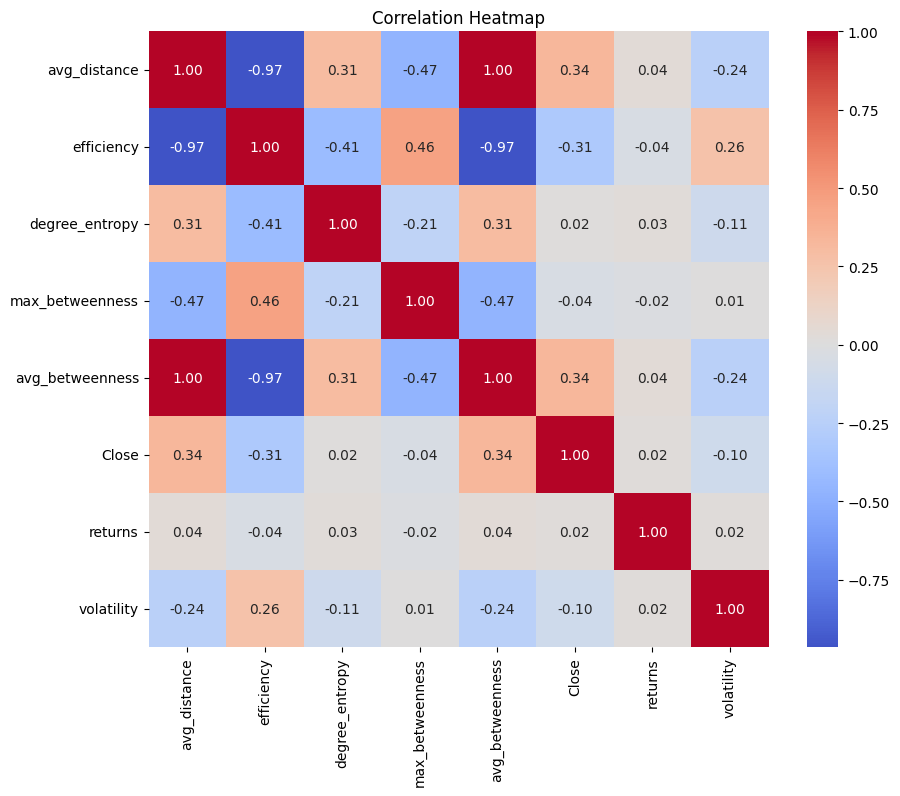

In [21]:
from src.plotting import plot_corr

cols_to_drop = ['max_degree', 'diameter']
df_subset = df_merged.drop(columns=cols_to_drop)

corr = df_subset.corr()

plot_corr(corr)

The interesting thing we could see is thet there are some good correlation between features and volitality but not alot with returns this gives us a signal that the network topology is useful in predicting market risk. Which makes sense theoretically also because during high stress periods the network topology changes alot, some notable ways are the stocks become more correlated causing the average distance between the stocks to decrease, which we could see here with the negative correlation. Also the market becomes more in sync so the disorder decreases, which we could see here by the negative correlation in the entropy and so on

In [22]:
df_merged["vol_median"] = df_merged["volatility"].rolling(WINDOW).median()         # rolling median volatility (e.g. 60-day)

df_merged["vol_high"] = (df_merged["volatility"] > df_merged["vol_median"]).astype(int)    # binary target: high vs low volatility

df_merged = df_merged.dropna()
df_merged.head()

,avg_distance,diameter,efficiency,max_degree,degree_entropy,max_betweenness,avg_betweenness,Close,returns,volatility,vol_median,vol_high
date,,,,,,,,,,,,
2010-06-25,6.882847,16,0.186181,8,1.940591,0.644628,0.048619,5269.049805,-0.009736,0.193833,0.165092,1
2010-06-28,6.802612,14,0.186313,8,1.927534,0.619428,0.047955,5333.500000,0.012158,0.194770,0.165251,1
2010-06-29,6.806344,16,0.186512,8,1.924623,0.749356,0.047986,5256.149902,-0.014609,0.194697,0.165586,1
2010-06-30,6.918299,17,0.186060,9,1.933485,0.689202,0.048912,5312.500000,0.010664,0.196001,0.165925,1
2010-07-01,6.742103,16,0.188582,9,1.950408,0.772660,0.047455,5251.399902,-0.011568,0.197347,0.166383,1


In [23]:
df_merged["vol_high"].value_counts(normalize=True)

vol_high
0    0.5324
1    0.4676
Name: proportion, dtype: float64

We could see that the regimes is approximately 50/50 so we could see that this is a good oppurtunity for a regression classification

## 3. Predicting volatility regimes using different features

Here, we work with three types of featurs to see wether our hypothesis is meaningful. We will make predictions using the scikit-learn library and using pytorch

In [24]:
from src.models import Regression
from src.models import Regression_Pytorch

### 1. Using Raw Features

In [25]:
features = [
    "avg_distance",
	"efficiency",
    "degree_entropy",
    "max_betweenness",
    "max_degree",
    'diameter',
]
target = 'vol_high'

In [26]:
df_reg = df_merged[features + ["vol_high"]]

for feature in features:  
	df_reg[feature] = df_reg[feature].shift(WINDOW)       # Applying shifting to the features to avoid look ahead bias and time leakage

df_reg = df_reg.dropna()
df_reg.head()

,avg_distance,efficiency,degree_entropy,max_betweenness,max_degree,diameter,vol_high
date,,,,,,,
2010-09-20,6.882847,0.186181,1.940591,0.644628,8.0,16.0,0
2010-09-21,6.802612,0.186313,1.927534,0.619428,8.0,14.0,0
2010-09-22,6.806344,0.186512,1.924623,0.749356,8.0,16.0,0
2010-09-23,6.918299,0.186060,1.933485,0.689202,9.0,17.0,0
2010-09-24,6.742103,0.188582,1.950408,0.772660,9.0,16.0,0


In [27]:
def time_split(x, train_size = 0.75):
  i = int(len(x) * train_size)
  return x[:i].copy(), x[i:].copy()

df_reg_train, df_reg_test = time_split(df_reg, train_size = 0.7)

In [28]:
X_train = df_reg_train[features]
y_train = df_reg_train[target]

X_test = df_reg_test[features]
y_test = df_reg_test[target]

--------------------------------------------------------------------------
Accuracy: 0.5464601769911505
ROC-AUC: 0.6332538450615259
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.52      0.84      0.65       443
           1       0.63      0.26      0.37       461

    accuracy                           0.55       904
   macro avg       0.58      0.55      0.51       904
weighted avg       0.58      0.55      0.50       904

--------------------------------------------------------------------------


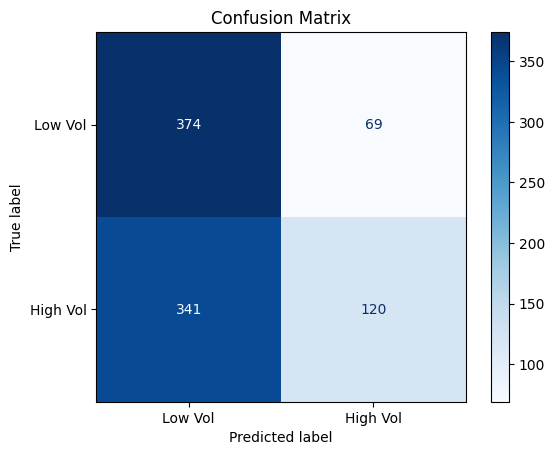

In [29]:
y_pred,y_prob = Regression(X_train, X_test, y_train, y_test)
classification_metrics(y_test, y_pred, y_prob)
plot_confusion_matrix(y_test,y_pred)

Epoch: 0 Loss: 0.7217556834220886
Epoch: 1500 Loss: 0.6941350102424622
Epoch: 3000 Loss: 0.6884409785270691
Epoch: 4500 Loss: 0.6857994794845581
Epoch: 6000 Loss: 0.6840959191322327
Epoch: 7500 Loss: 0.682893693447113
Epoch: 9000 Loss: 0.6820017695426941
Epoch: 10500 Loss: 0.681312084197998
Epoch: 12000 Loss: 0.6807596683502197
Epoch: 13500 Loss: 0.6803045868873596

Final weight: tensor([[-0.1465,  0.0755,  0.0905,  0.2556, -0.2501,  0.3007]])
Final bias: tensor([-0.2035])
--------------------------------------------------------------------------
Accuracy: 0.5464601769911505
ROC-AUC: 0.5974155702344985
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.53      0.76      0.62       443
           1       0.60      0.34      0.43       461

    accuracy                           0.55       904
   macro avg       0.56      0.55      0.53       904
weighted av

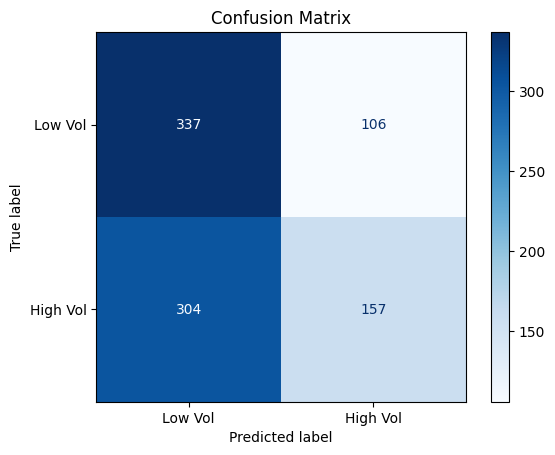

In [30]:
y_pred,y_prob = Regression_Pytorch(X_train, X_test, y_train, y_test)
classification_metrics(y_test, y_pred, y_prob)
plot_confusion_matrix(y_test,y_pred)

### 2. Using Princepal Component Features

Lets first create the principal component features

Explained variance per component: [0.61975003 0.16782651 0.11785428 0.0686993  0.02282432]
Cumulative explained variance: [0.61975003 0.78757654 0.90543083 0.97413013 0.99695445]
--------------------------------------------------------------------------
PCA Loadings:
                      PC1       PC2       PC3       PC4       PC5
avg_distance    -0.487422 -0.252207  0.182844  0.071238 -0.352053
efficiency       0.497482  0.096601 -0.185686  0.036286  0.523061
degree_entropy  -0.262284  0.778107  0.067155  0.563961  0.039279
max_betweenness  0.312174  0.100967  0.938335 -0.107299  0.000898
max_degree       0.390233 -0.417051  0.005989  0.779048 -0.246017
diameter        -0.443175 -0.370789  0.216957  0.239014  0.735118
--------------------------------------------------------------------------


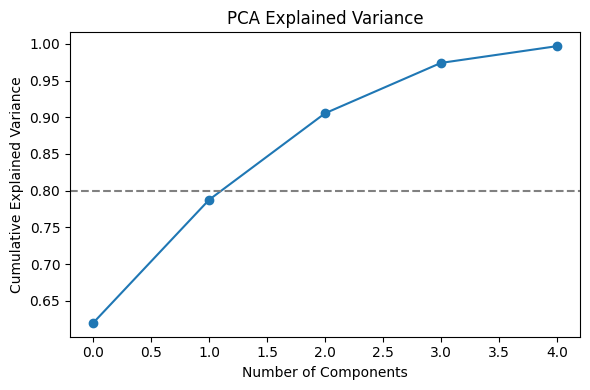

In [31]:
from src.data_extraction import pca_transformation

num_components = 5
index = df_reg.index

X = df_reg[features]

df_pca, pca_columns = pca_transformation(X,num_components,index,features)
df_pca['vol_high'] = df_merged['vol_high']


In [32]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,vol_high
date,,,,,,
2010-09-20,0.657463,0.827749,-1.151416,-0.080360,0.180173,0
2010-09-21,0.971069,0.643789,-1.748829,-0.471429,-0.267239,0
2010-09-22,1.435852,0.554074,0.503459,-0.627833,0.195050,0
2010-09-23,1.015427,0.351560,-0.361816,0.162877,0.255748,0
2010-09-24,1.602794,1.180695,0.917917,0.293787,0.200061,0


In [33]:
features = pca_columns
target = 'vol_high'

In [34]:
df_pca_train,df_pca_test = time_split(df_pca, train_size = 0.7)

In [35]:
X_train = df_pca_train[features]
y_train = df_pca_train[target]

X_test = df_pca_test[features]
y_test = df_pca_test[target]

--------------------------------------------------------------------------
Accuracy: 0.5752212389380531
ROC-AUC: 0.6414997331348575
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.55      0.76      0.64       443
           1       0.63      0.39      0.49       461

    accuracy                           0.58       904
   macro avg       0.59      0.58      0.56       904
weighted avg       0.59      0.58      0.56       904

--------------------------------------------------------------------------


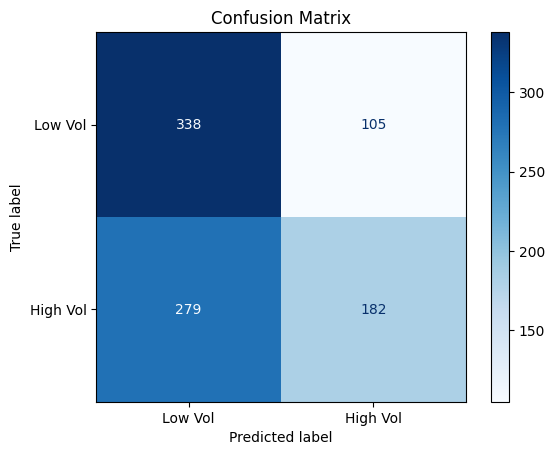

In [36]:
y_pred,y_prob = Regression(X_train, X_test, y_train, y_test)
classification_metrics(y_test, y_pred, y_prob)
plot_confusion_matrix(y_test,y_pred)

Epoch: 0 Loss: 0.7724116444587708
Epoch: 1500 Loss: 0.7270455360412598
Epoch: 3000 Loss: 0.7026433944702148
Epoch: 4500 Loss: 0.6901078224182129
Epoch: 6000 Loss: 0.6838362812995911
Epoch: 7500 Loss: 0.6807427406311035
Epoch: 9000 Loss: 0.6792271733283997
Epoch: 10500 Loss: 0.6784871220588684
Epoch: 12000 Loss: 0.6781259179115295
Epoch: 13500 Loss: 0.6779496073722839

Final weight: tensor([[-0.1316,  0.1166,  0.2263, -0.0897, -0.0028]])
Final bias: tensor([-0.1829])
--------------------------------------------------------------------------
Accuracy: 0.577433628318584
ROC-AUC: 0.6424349852856927
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.55      0.73      0.63       443
           1       0.62      0.43      0.51       461

    accuracy                           0.58       904
   macro avg       0.59      0.58      0.57       904
weighted avg       

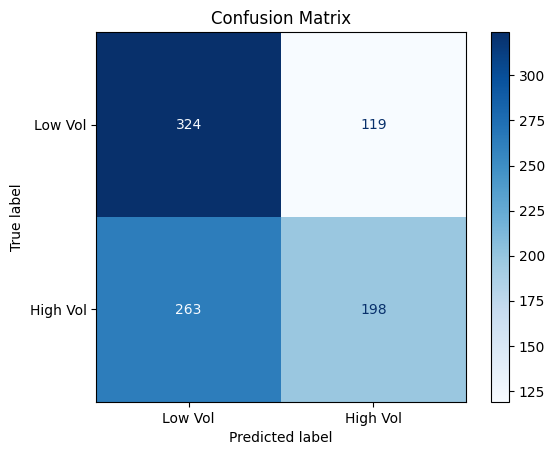

In [37]:
y_pred,y_prob = Regression_Pytorch(X_train, X_test, y_train, y_test)
classification_metrics(y_test, y_pred, y_prob)
plot_confusion_matrix(y_test,y_pred)

### 3. Using Log returns to make prediction (Baseline) 

In [38]:
features = ['Close']
target = 'vol_high'

In [39]:
df_prices = df_merged[features + ['vol_high']]

for feature in features:  
	df_prices[feature] = df_prices[feature].shift(WINDOW)

df_prices = df_prices.dropna()

In [40]:
df_prices['vol_high'].value_counts(normalize=True)

vol_high
0    0.530389
1    0.469611
Name: proportion, dtype: float64

In [41]:
df_prices_train, df_prices_test = time_split(df_prices,train_size=0.7)

In [42]:
X_train = df_prices_train[features]
y_train = df_prices_train[target]

X_test = df_prices_test[features]
y_test = df_prices_test[target]

--------------------------------------------------------------------------
Accuracy: 0.5918141592920354
ROC-AUC: 0.5883960180782771
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.82      0.21      0.34       443
           1       0.56      0.96      0.71       461

    accuracy                           0.59       904
   macro avg       0.69      0.58      0.52       904
weighted avg       0.69      0.59      0.52       904

--------------------------------------------------------------------------


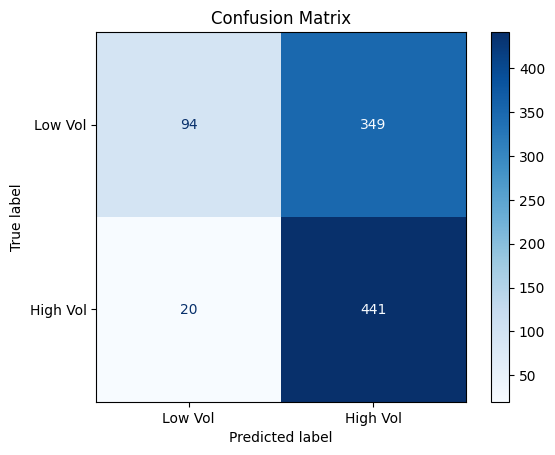

In [43]:
y_pred,y_prob = Regression(X_train, X_test, y_train, y_test)
classification_metrics(y_test, y_pred, y_prob)
plot_confusion_matrix(y_test,y_pred)

Epoch: 0 Loss: 0.9304994940757751
Epoch: 1500 Loss: 0.817128598690033
Epoch: 3000 Loss: 0.7520180344581604
Epoch: 4500 Loss: 0.7183637022972107
Epoch: 6000 Loss: 0.7019466757774353
Epoch: 7500 Loss: 0.6941307187080383
Epoch: 9000 Loss: 0.6904358863830566
Epoch: 10500 Loss: 0.6886890530586243
Epoch: 12000 Loss: 0.6878612041473389
Epoch: 13500 Loss: 0.6874679327011108

Final weight: tensor([[0.0858]])
Final bias: tensor([-0.1629])
--------------------------------------------------------------------------
Accuracy: 0.5962389380530974
ROC-AUC: 0.5883960180782771
--------------------------------------------------------------------------
The Classification Report is: 

              precision    recall  f1-score   support

           0       0.73      0.28      0.40       443
           1       0.57      0.90      0.70       461

    accuracy                           0.60       904
   macro avg       0.65      0.59      0.55       904
weighted avg       0.65      0.60      0.55       904

-

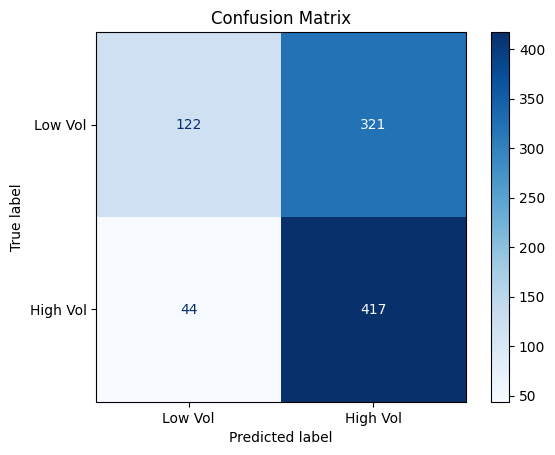

In [44]:
y_pred,y_prob = Regression_Pytorch(X_train, X_test, y_train, y_test)
classification_metrics(y_test, y_pred, y_prob)
plot_confusion_matrix(y_test,y_pred)